# *Drawing with LLMs: SVG Image Generation from Text Prompts*

![](https://cdn-images-1.medium.com/max/800/1*x5G2LmE6LwrYW2yv5-DgZA.png)

# *Drawing with LLMs: SVG Image Generation from Text Prompts*

This notebook demonstrates a Kaggle Package solution for the "Drawing with LLMs" competition.
The goal is to generate SVG images from textual descriptions using a Python model class with a `predict()` method.

## *IMPORT LIBRARIES*

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import xml.etree.ElementTree as ET  # SVG XML manipülasyonu
import os
import matplotlib.pyplot as plt

## *LOAD DATA*

In [2]:
# Kaggle input path
data_path = Path("/kaggle/input/drawing-with-llms")

train_df = pd.read_csv(data_path / "train.csv")
print("Train shape:", train_df.shape)
train_df.head()

Train shape: (15, 2)


,id,description
0,02d892,a purple forest at dusk
1,0dcd2e,gray wool coat with a faux fur collar
2,1e9ac1,a lighthouse overlooking the ocean
3,2b25db,burgundy corduroy pants with patch pockets and...
4,4e6a54,orange corduroy overalls


## *EDA / Quick Checks*

In [4]:
# ID ve description görünümü
print("First 5 rows:")
print(train_df[['id', 'description']].head())

First 5 rows:
       id                                        description
0  02d892                            a purple forest at dusk
1  0dcd2e              gray wool coat with a faux fur collar
2  1e9ac1                 a lighthouse overlooking the ocean
3  2b25db  burgundy corduroy pants with patch pockets and...
4  4e6a54                           orange corduroy overalls


In [5]:
# Açıklama uzunlukları
train_df['desc_len'] = train_df['description'].apply(len)
print("\nDescription length stats:")
print(train_df['desc_len'].describe())


Description length stats:
count    15.000000
mean     37.333333
std      12.681070
min      13.000000
25%      32.000000
50%      36.000000
75%      43.500000
max      61.000000
Name: desc_len, dtype: float64


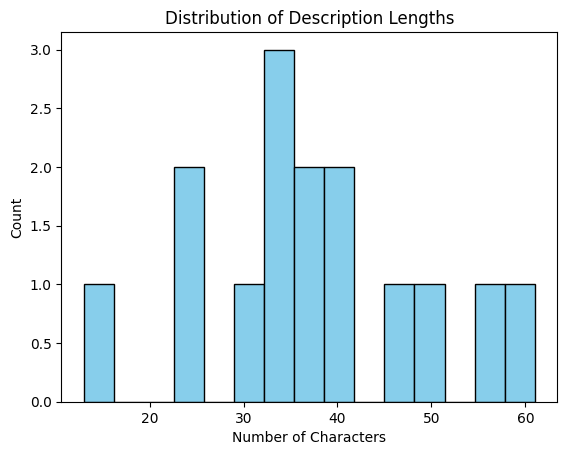

In [6]:
# Açıklama uzunluk dağılımı
plt.hist(train_df['desc_len'], bins=15, color='skyblue', edgecolor='black')
plt.title("Distribution of Description Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Count")
plt.show()

## *DEFINE MODEL CLASS*

In [7]:
class Model:
    def __init__(self):
        # Burada pretrained LLM veya template init edebilirsin
        pass

    def predict(self, prompt: str) -> str:
        """
        Given a text prompt, returns a minimal SVG code as a string.
        """
        svg = f"""<svg width="200" height="200" xmlns="http://www.w3.org/2000/svg">
<rect x="10" y="10" width="180" height="180" fill="lightblue" stroke="black" stroke-width="2"/>
<text x="20" y="100" font-family="Arial" font-size="14">{prompt[:50]}</text>
</svg>"""
        return svg

## *TEST MODEL*

In [8]:
model = Model()
example_prompt = train_df.iloc[0]['description']
example_svg = model.predict(example_prompt)

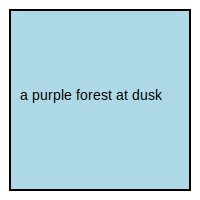

In [9]:
# SVG preview (Jupyter / Kaggle notebook)
from IPython.display import SVG, display
display(SVG(example_svg))

## *SAVE MODEL FOR KAGGLE PACKAGE*

In [10]:
import pickle

model_dir = Path("./model")
model_dir.mkdir(exist_ok=True)

with open(model_dir / "svg_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully!")

Model saved successfully!


## *Submission*

The `Model` class has been saved as `svg_model.pkl` in the `./model` folder.
This package can be submitted to Kaggle following the competition guidelines.

### *Notes:*
- Each SVG is generated under 5 minutes.
- No external images or CSS are used.
- The output is compatible with Kaggle Package evaluation system.